In [1]:
from models.model2_linear import Dynamic_Bicycle_Linear
from models.model2 import BicycleModel
from models.model4 import FourWheelModel
from models.model4_joel import FourWheelModel_load_transfer
import matplotlib.pyplot as plt
from models.utils import get_csv_row_count
from models.utils import get_folder_path

import numpy as np

In [18]:

dt = 0.025 # = 1/40 = 1/control_frequency
#filepath = get_folder_path()+'/open_loop_inputs/open_loop_sim_amzsim_model_PLEASE.csv'
filepath = '/Users/jonas/Desktop/intergation_model/open_loop_inputs/car_command_for_sim_PLEASE.csv'
N = get_csv_row_count(filepath)
print(N)

open_loop_tf =N*dt
print(open_loop_tf)

T_peak = 0.37
T_slope = 0.4
model4_load = FourWheelModel_load_transfer(dt,open_loop_tf, T_peak, T_slope)
model4 = FourWheelModel(dt,open_loop_tf, T_peak, T_slope)
t,x_model = model4_load.do_open_loop_sim_from_csv(filepath)

t,x_model_with_slip = model4_load.do_open_loop_sim_from_csv(filepath)

length = 50

x = np.arange(0,len(model4_load.comp_slips[length:]),1)
abs_dif = []
for i in range(len(model4_load.slips)):
    abs_dif.append(np.abs(model4_load.slips[i]- model4_load.comp_slips[i]))
size = 7
plt.scatter(x, model4_load.slips[length:], color = 'blue', s = size, label = r'With simplification' )
plt.scatter(x, model4_load.comp_slips[length:], color = 'red', s = size,label =  r'Without simplification')
plt.scatter(x, abs_dif[length:], color = 'green', s = size, label = r'Absolute mismatch')

plt.xlabel(r'Iterations')
plt.ylabel(r' Slip angle$ \rm [rad]$')
plt.legend()
#plt.plot(ref_traj,ref_traj, color = 'black')
#x = np.arange(0,(Fx_fl.shape[0]), 1)
#plt.scatter(x,y, color = 'red')
#plt.scatter(x,y, color = 'blue')
#plt.xlabel(r'$x \rm [m]$')
#plt.ylabel(r'$y \rm [m]$')
#plt.legend(r'Trajectory')
#
#plt.axis()


'''file_path = '/Users/jonas/Desktop/intergation_model/open_loop_inputs/open_loop_sim_amzsim_model.csv'
data = np.genfromtxt(file_path, delimiter=',', skip_header=0, names=True, dtype=None)
# Access each column by its tag
Fx_fl = data['Fx_fl']
Fx_fr = data['Fx_fr']
Fx_rl = data['Fx_rl']
Fx_rr = data['Fx_rr']
steering_angle = data['steering_angle']

x_ref = data['x']
y_ref = data['y']
yaw_ref = data['yaw']
vx_ref = data['vx']
vy_ref = data['vy']
dyaw_ref = data['dyaw']

ref_commands = np.hstack([Fx_fl.reshape(-1,1), Fx_fr.reshape(-1,1), Fx_rl.reshape(-1,1), Fx_rr.reshape(-1,1), steering_angle.reshape(-1,1)])
ref_traj_new = np.hstack([x_ref.reshape(-1,1), y_ref.reshape(-1,1), yaw_ref.reshape(-1,1), vx_ref.reshape(-1,1), vy_ref.reshape(-1,1), dyaw_ref.reshape(-1,1)])

t,traj_model = model2.do_open_loop_sim_from_np_array(ref_commands, ref_traj_new, )'''





2100
52.5


/Users/jonas/Desktop/intergation_model/open_loop_inputs/car_command_for_sim_PLEASE.csv


(-30.0, 50.0, -80.0, 25.0)

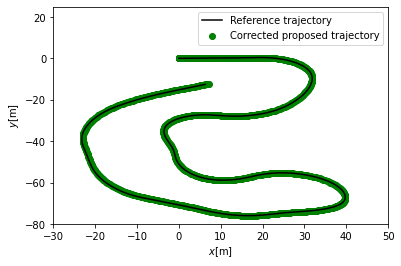

In [43]:


dt = 0.025 # = 1/40 = 1/control_frequency
file_path = get_folder_path()+'/open_loop_inputs/car_command_for_sim_PLEASE.csv'
print(file_path)
N = get_csv_row_count(file_path)

open_loop_tf =N*dt

T_peak_2 = 0.4
T_slope_2 = 0.37

T_peak_4 = 0.37
T_slope_4 = 0.4

model2 = BicycleModel(dt,open_loop_tf, T_peak_2, T_slope_2)
model4 = FourWheelModel_load_transfer(dt,open_loop_tf, T_peak_4, T_slope_4)
#t,x_vect_ref = get_open_loop_data(model2, file_path)



t,x_vect = model4.do_open_loop_sim_from_csv(file_path)
t, x_traj, kpi = model2.do_open_loop_sim_from_amzsim_maoeuvers(chunk_size=500)

x = x_vect[:1000,0]
y = x_vect[:1000,1]

plt.plot(x,y, color = 'black', label = r'Reference trajectory')
plt.scatter(x_traj[:1000,0], x_traj[:1000,1], color = 'green', label = r'Corrected proposed trajectory')
plt.xlabel(r'$x \rm [m]$')
plt.ylabel(r'$y \rm [m]$')
plt.xlim(-30, 50)   
plt.ylim(-80, 25)  
plt.legend()
plt.axis()
#model4.store_amzsim_manoeuvers_position()





In [10]:
print(get_folder_path())

/Users/jonas/Desktop/intergation_model


In [11]:

import os
folder_path = os.path.abspath("")

In [16]:
folder_path

'/Users/jonas/Desktop/intergation_model'

In [35]:
l2_norm_position = np.linalg.norm(np.array([[0,1],[2,3]]), axis=1).sum()
l2_norm_position

4.60555127546399

In [32]:
np.array([[0,1],[2,3]])

array([[0, 1],
       [2, 3]])

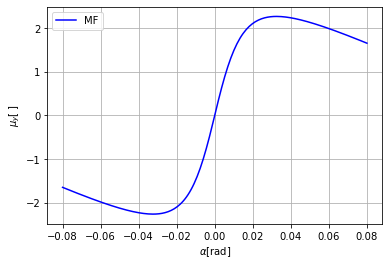

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example data
alpha = np.linspace(-0.08, 0.08, 200)  # Example data for x-axis
B = 60.0
C = 0.9
D = 3.3663
E = 0.0
BCD = 6

# Calculate Pacejka coefficients
Fy = D * np.sin(C * np.arctan(B * alpha - E * (B * alpha - np.arctan(B * alpha)))) * (1.0 - BCD * np.abs(alpha))

# Plotting
plt.plot(alpha, Fy, label='MF', color = 'b')
plt.xlabel(r'$\alpha \rm [rad]$')
plt.ylabel(r'$\mu_y \rm [\;]$')
#plt.title('Pacejka Magic Formula')
plt.grid(True)
plt.legend()
plt.show()


In [6]:
data = np.genfromtxt('open_loop_inputs/open_loop_sim_amzsim_model.csv', delimiter=',',  dtype=None, names=True)

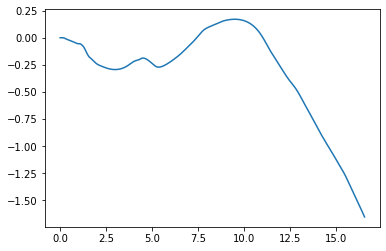

In [8]:
plt.plot(data['x'],data['y'])

(-8.833708774820366,
 20.804617170688864,
 -3.192989390279487,
 2.5541688494739527)

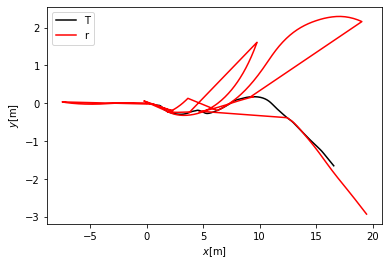